# Tracer une carte en Python

Le notebook propose plusieurs façons de tracer une carte en Python.

Il y a principalement trois façons de tracer une carte. La première est statique avec des modules comme [basemap](https://matplotlib.org/basemap/) (*plus trop maintenu*) ou [cartopy](http://scitools.org.uk/cartopy/) qui sont des surcouches de [matplotlib](https://matplotlib.org/). Le second moyen est une carte animée ou non dans un notebook avec des modules comme [pygal](http://www.pygal.org/en/stable/documentation/types/maps/pygal_maps_world.html), [plotly](https://plot.ly/python/choropleth-maps/). La dernière consiste à insérer des éléments sur une carte en ligne telle que [OpenStreetMap](https://www.openstreetmap.org/) et le module [folium](https://github.com/python-visualization/folium) ou [ipyleaflet](https://github.com/ellisonbg/ipyleaflet).

Il y a souvent trois problèmes avec les cartes. Le premier sont avec les coordonnées. Les plus utilisées sont les coordonnées [longitude / latitude](https://fr.wikipedia.org/wiki/Coordonn%C3%A9es_g%C3%A9ographiques). Le problème est chaque pays a son propre système adapté à sa position géographique. Il faut souvent convertir (voir [lambert93_to_WGPS](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/ensae_teaching_cs/helpers/geo_helper.html?highlight=basemap#ensae_teaching_cs.helpers.geo_helper.lambert93_to_WGPS), [pyproj](https://jswhit.github.io/pyproj/)). Le second problème est l'ajout de repères géographiques (frontières, fleuves, ...). Certains modules contiennent certaines informations, souvent pour les Etats-Unis. Mais souvent, il faut récupérer ces informations sur les sites open data de chaque pays : [départements français](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td1a_cenonce_session_12.html?highlight=basemap#cartes-avec-les-departements). La troisième difficulté est qu'on veut tracer des cartes très chargées et cela prend un temps fou.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## données

In [3]:
from papierstat.datasets import load_enedis_dataset
df = load_enedis_dataset()
df.head(n=2).T

,0,1
Année,2016,2016
Nom commune,Ponteilla,Varreddes
Code commune,66145,77483
Nom EPCI,CU Perpignan Méditerranée (Pmcu),CA Pays de Meaux
Code EPCI,200027183,247700628
Type EPCI,CU,CA
Nom département,Pyrénées-Orientales,Seine-et-Marne
Code département,66,77
Nom région,Occitanie,Île-de-France
Code région,76,11


## cartopy

[basemap](https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement) est l'ancêtre des modules de tracé de cartes sous Python mais il n'est plus vraiment maintenu. Il faut utiliser [cartopy](http://scitools.org.uk/cartopy/). Contrairement à *basemap*, *cartopy* n'installe pas toutes les données dont il a besoin mais télécharge celle dont il a besoin pour tracer une carte. La [projection](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html) indique comment la surface de la terre, sphérique, sera projetée dans le plan. Ensuite, il faut un système de coordonnées pour localiser un point sur la surface. Le plus utilisée est [WGS_84](https://fr.wikipedia.org/wiki/WGS_84) ou longitude, latitude. En France, l'[INSEE](https://www.insee.fr/fr/information/2526242) utilise aussi le système [Lambert 93](https://epsg.io/2154) ou *EPSG 2154*. Source : [Introduction à la manipulation de données cartographiques](https://medium.com/@_FrancoisM/introduction-%C3%A0-la-manipulation-de-donn%C3%A9es-cartographiques-23b4e38d8f0f). Tout n'est pas parfait dans Cartopy comme ce problème [Create Cartopy projection from pyproj.Proj](https://github.com/SciTools/cartopy/issues/813).

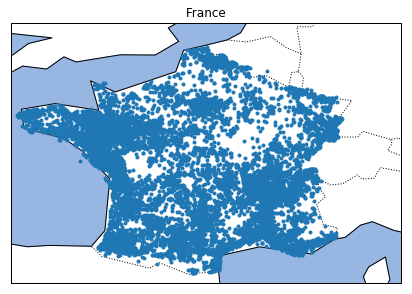

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.plot(df.long, df.lat, '.')
ax.set_title('France');

On ajoute un système de coordonnées français particulièrement intéressant pour la France. On convertit d'abord longitude, latitude en Lambert 93.

In [5]:
from pyproj import Proj, transform
p1 = Proj(init='epsg:4326')  # longitude / latidude
p2 = Proj(init='epsg:2154')  # Lambert 93
transform(p1, p2, -5, 42)

(36954.44139527541, 6133555.145153085)

In [6]:
transform(p1, p2, 10, 52)

(1181938.177574663, 7233428.2223392185)

On convertit toutes les coordonnées.

In [7]:
lamb_x, lamb_y = transform(p1, p2, df.long.as_matrix(), df.lat.as_matrix())

Et on dessine deux cartes, la première en longitude, latitude, la seconde en Lambert 93.

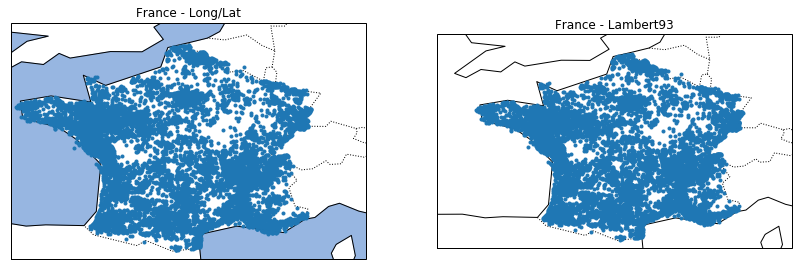

In [8]:
import cartopy.crs as ccrs
from cartopy.crs import CRS, Globe
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def parse_option_pyproj(s):
    r = s.strip('+').split('=')
    if len(r) == 2:
        if ',' in r[1]:
            return r[0], tuple(int(_) for _ in r[1].split(','))
        try:
            return r[0], float(r[1])
        except ValueError:
            return r[0], r[1]
    else:
        return r[0], True
    
class MyCRS(CRS):
    def __init__(self, proj4_params, globe=None):
        super(MyCRS, self).__init__(proj4_params, globe or Globe())

# voir https://epsg.io/2154, cliquer sur proj.4
proj4_params = "+proj=lcc +lat_1=49 +lat_2=44 +lat_0=46.5 +lon_0=3 +x_0=700000 " + \
               "+y_0=6600000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
    
# Ne sert à rien si ce n'est à vérifier que le format est correct.    
import pyproj
lambert93 = pyproj.Proj(proj4_params)

# Système de coordonnées de cartopy.
proj4_list = [(k, v) for k,v in map(parse_option_pyproj, proj4_params.split())]
crs_lambert93 = MyCRS(proj4_list, globe=None)

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.plot(df.long, df.lat, '.')  # 
ax.set_title('France - Long/Lat')

df = df.copy()


ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax.set_extent([36954, 1181938, 6133555, 7233428], crs_lambert93)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.plot(lamb_x, lamb_y, '.', transform=crs_lambert93)  # ne pas oublier transform=crs_lambert93
ax.set_title('France - Lambert93');

## plotly

Il faut s'authentifier.

## geopandas

[geopandas](http://geopandas.org/) est l'outil qui devient populaire. La partie cartes est accessible via l'[API de geopandas](http://geopandas.org/mapping.html). Il n'inclut moins de données que *basemap*.

In [9]:
import geopandas as gpd
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


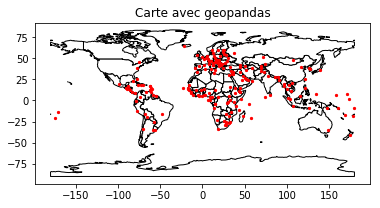

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker='o', color='red', markersize=5)
ax.set_title('Carte avec geopandas');

On restreint à l'Europe et pas trop loin de la France métropole.

In [12]:
from shapely.geometry import Polygon
europe = world[world.continent == "Europe"].copy()
europe['geometry'] = europe.geometry.intersection(Polygon([(-10,35), (50,35), (50,70), (-10, 70)]))
europe.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."
12,10414336.0,Europe,Belgium,BEL,389300.0,"POLYGON ((3.314971144228537 51.34578095153609,..."
16,7204687.0,Europe,Bulgaria,BGR,93750.0,"POLYGON ((22.65714969248299 44.23492300066128,..."
18,4613414.0,Europe,Bosnia and Herz.,BIH,29700.0,"POLYGON ((19.00548628101012 44.86023366960916,..."


In [13]:
from shapely.geometry import Point
points = [Point(lon, lat) for ind, lat, lon in df[['lat', 'long']][:1000].itertuples()]
enedis = gpd.GeoDataFrame(data=dict(geometry=points))
enedis.head()

,geometry
0,POINT (2.82631103755 42.6323626522)
1,POINT (2.92725176893 49.0059497861)
2,POINT (4.21389044246 44.4604648196)
3,POINT (0.974214866115 47.1204664673)
4,POINT (5.08531612205 48.6170558356)


Text(0.5,1,"Carte de l'Europe avec geopandas")

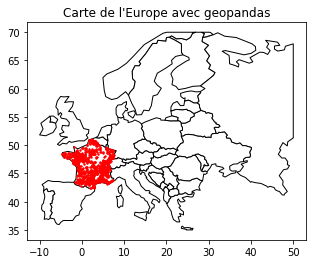

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
europe.plot(ax=ax, color='white', edgecolor='black')
enedis.plot(ax=ax, marker='o', color='red', markersize=2)
ax.set_title("Carte de l'Europe avec geopandas")

## folium

In [15]:
import folium
map_osm = folium.Map(location=[48.85, 2.34])

for ind, lat, lon, com in df[['lat', 'long', 'Nom commune']][:50].itertuples():
    map_osm.add_child(folium.RegularPolygonMarker(location=[lat,lon], popup=com,
                       fill_color='#132b5e', radius=5))

map_osm

## cartopy avec les données d'OpenStreetMap

On peut choisir également d'inclure ces détails dans une image fixe si l'image va dans un rapport écrit. On utilise les données d'[OpenStreetMap](http://openstreetmap.fr/) avec un certain [niveau de détail](https://wiki.openstreetmap.org/wiki/Zoom_levels).

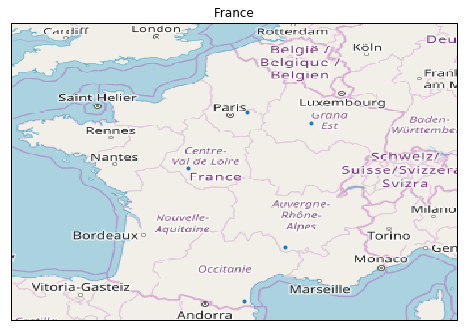

In [16]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import OSM

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

imagery = OSM()
ax.add_image(imagery, 5)
# plus c'est grand, plus c'est précis, plus ça prend du temps

ax.plot(df.long[:5], df.lat[:5], '.')
ax.set_title('France');

## cartes avec bokeh

[bokeh](https://bokeh.pydata.org/en/latest/) n'inclut aucune données géographiques, il faut les récupérer. Les pays sont disponibles à cette adresse [github.com/johan](https://github.com/johan/world.geo.json).

In [17]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [18]:
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource
from bokeh.models import Range1d
from papierstat.datasets import get_geojson_countries

with open(get_geojson_countries(), "r") as f:
    countries = GeoJSONDataSource(geojson=f.read())

tools = "pan,wheel_zoom,reset,previewsave"
p = figure(width=1000, height=600, tools=tools, title='World Countries', 
           x_axis_label='Longitude', y_axis_label='Latitude')
p.background_fill_color = "aqua"
p.x_range = Range1d(start=-180, end=180)
p.y_range = Range1d(start=-90, end=90)
p.patches("xs", "ys", color="white", line_color="black", source=countries)
show(p)

Et plus spécifique autour de la France avec quelques animations.

In [19]:
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
from bokeh.models.glyphs import Patches

tools = "pan,wheel_zoom,reset,previewsave"
p = figure(width=500, height=400, tools=tools, title='World Countries', 
           x_axis_label='Longitude', y_axis_label='Latitude')
p.background_fill_color = "aqua"
p.x_range = Range1d(start=-5, end=10)
p.y_range = Range1d(start=42, end=52)

pat1 = Patches(xs="xs", ys="ys", fill_color="white", line_color="black")
p.add_glyph(countries, pat1)

communes = ColumnDataSource(data=dict(xc=df.long, yc=df.lat, commune=df['Nom commune'],
                                  tension=df['Domaine de tension']))
p.scatter(x="xc", y="yc", fill_color="blue", line_color="blue", source=communes)

hover = HoverTool(tooltips=[("->", "@commune"), ('T', "@tension")],
                  mode="mouse", point_policy="follow_mouse")
p.add_tools(hover)

show(p)